### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

#changed index_col to 0 so first row becomes header row
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 0) 

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.head(3)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,62300.1,61296.5,124903,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182695,80875.8,67771,60491.3,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025,NaN,78252,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,60993.3,63187.1,122088,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468,NaN,75885.7,72937.9,NaN,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2


In [4]:
properties.shape

(306, 48)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [5]:
dflon = properties.transpose()
dflon.head(3)

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,1995-10-01,1995-11-01,1995-12-01,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,1996-11-01,1996-12-01,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,...,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,108038,117636,127232,108999,93356.7,93706.7,120543,112050,114226,97546.7,114179,108138,98934.2,99706.8,106427,116343,111142,107488,108480,115453,118317,117034,113585,115159,121251,131074,130035,124382,143829,156508,...,820665,853943,906146,939912,930979,854798,847422,836674,818477,790159,778002,802129,783266,740799,732351,796399,789278,809697,784144,800875,802869,764207,811694,865636,894520,853451,738797,719218,761526,756407,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,51513.8,50848.7,50945.2,50828.1,51440.7,51907.1,51724,51735.7,50761.4,50621.1,51104.7,51892.7,52533.2,52216,53853.5,54459,55451.5,55004.8,55279.9,54936.9,55286.7,55658.9,56506.7,56306.3,57200.2,57575.3,58025,57559,57360.3,57908.5,...,280698,278213,280567,286018,289569,291727,290965,292519,293390,293796,292915,291548,292777,291723,291184,290239,294236,294953,295908,296424,299648,302606,301114,297181,293839,294065,295498,295092,293889,297426,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,92567.4,90883.2,91133.9,91111,92429.5,91409.8,92394.2,91058.9,91978.2,92444.1,95516,97489.9,97844.5,97155,97174.3,98558.8,100076,101130,101201,103287,104609,107235,108730,112380,114515,115356,115521,115902,116995,118866,...,540501,549401,543699,544994,531344,527928,526223,537986,544090,541563,538718,531832,531736,538120,541502,533088,524702,523397,533715,534951,537284,535060,533810,528639,523679,516531,512343,503911,512694,514668,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [6]:
dflon.index

Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37',
       'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [7]:
dflon1 = dflon.reset_index()
dflon1.rename(columns={dflon1.columns[0]: "Borough", dflon1.columns[1]: "Postal Code"}, inplace = True)
dflon1.head(3)

,Borough,Postal Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,...,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
0,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,108038,117636,127232,108999,93356.7,93706.7,120543,112050,114226,97546.7,114179,108138,98934.2,99706.8,106427,116343,111142,107488,108480,115453,118317,117034,113585,115159,121251,131074,130035,124382,143829,...,820665,853943,906146,939912,930979,854798,847422,836674,818477,790159,778002,802129,783266,740799,732351,796399,789278,809697,784144,800875,802869,764207,811694,865636,894520,853451,738797,719218,761526,756407,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,51513.8,50848.7,50945.2,50828.1,51440.7,51907.1,51724,51735.7,50761.4,50621.1,51104.7,51892.7,52533.2,52216,53853.5,54459,55451.5,55004.8,55279.9,54936.9,55286.7,55658.9,56506.7,56306.3,57200.2,57575.3,58025,57559,57360.3,...,280698,278213,280567,286018,289569,291727,290965,292519,293390,293796,292915,291548,292777,291723,291184,290239,294236,294953,295908,296424,299648,302606,301114,297181,293839,294065,295498,295092,293889,297426,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,92567.4,90883.2,91133.9,91111,92429.5,91409.8,92394.2,91058.9,91978.2,92444.1,95516,97489.9,97844.5,97155,97174.3,98558.8,100076,101130,101201,103287,104609,107235,108730,112380,114515,115356,115521,115902,116995,...,540501,549401,543699,544994,531344,527928,526223,537986,544090,541563,538718,531832,531736,538120,541502,533088,524702,523397,533715,534951,537284,535060,533810,528639,523679,516531,512343,503911,512694,514668,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503


In [8]:
dflon1.columns

Index([          'Borough',       'Postal Code', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00,
       2019-11-01 00:00:00, 2019-12-01 00:00:00, 2020-01-01 00:00:00,
       2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00,
       2020-05-01 00:00:00],
      dtype='object', length=307)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [9]:
dflon_cleaned = pd.melt(dflon1, id_vars= ['Borough', 'Postal Code'])
dflon_cleaned.rename(columns={dflon_cleaned.columns[2]: "Month"}, inplace = True)
dflon_cleaned.rename(columns={dflon_cleaned.columns[3]: "Avg Value"}, inplace = True)
dflon_cleaned.head(3)

,Borough,Postal Code,Month,Avg Value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [10]:
dflon_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Borough      14640 non-null  object        
 1   Postal Code  13725 non-null  object        
 2   Month        14640 non-null  datetime64[ns]
 3   Avg Value    13725 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 457.6+ KB


In [11]:
# change Avg Value from datatype=object to float
dflon_cleaned['Avg Value']= pd.to_numeric(dflon_cleaned['Avg Value'], downcast="float")
dflon_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Borough      14640 non-null  object        
 1   Postal Code  13725 non-null  object        
 2   Month        14640 non-null  datetime64[ns]
 3   Avg Value    13725 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(2)
memory usage: 400.4+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [12]:
dflon_cleaned.count()

Borough        14640
Postal Code    13725
Month          14640
Avg Value      13725
dtype: int64

In [13]:
dflon_cleaned[dflon_cleaned['Avg Value'].isna()]

,Borough,Postal Code,Month,Avg Value
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
14580,Unnamed: 37,NaN,2020-04-01,NaN
14590,Unnamed: 47,NaN,2020-04-01,NaN
14625,Unnamed: 34,NaN,2020-05-01,NaN
14628,Unnamed: 37,NaN,2020-05-01,NaN


In [14]:
dflon_final = dflon_cleaned.dropna()
dflon_final.count()

Borough        13725
Postal Code    13725
Month          13725
Avg Value      13725
dtype: int64

Clean out rows/ values which is not classified as a 'Borough'. From [Wikipedia](https://https://en.wikipedia.org/wiki/London_boroughs), there are 32 Boroughs in London

In [15]:
dflon_final['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [16]:
# filter out rows which is not a Borough, check if value of unique Boroughs = 32 
not_borough = ['City of London', 'Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

dflon_final = dflon_final[~dflon_final['Borough'].isin(not_borough)]
dflon_final['Borough'].nunique()

32

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [17]:
barnet = dflon_cleaned.loc[dflon_cleaned['Borough']=='Barnet'].reset_index(drop=True)
barnet.head(3)

,Borough,Postal Code,Month,Avg Value
0,Barnet,E09000003,1995-01-01,93284.515625
1,Barnet,E09000003,1995-02-01,93190.171875
2,Barnet,E09000003,1995-03-01,92247.523438


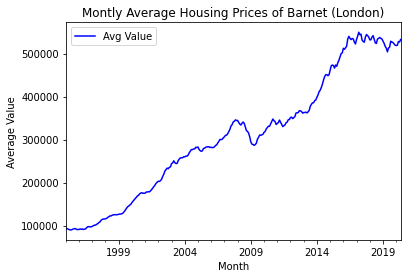

In [18]:
barnet.plot(kind='line',x='Month',y='Avg Value',color='blue')
plt.ylabel('Average Value')
plt.title('Montly Average Housing Prices of Barnet (London)')
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [19]:
dflon_final['Year'] = dflon_final['Month'].map(lambda x: x.year)
dflon_final['Avg Value'] = dflon_final['Avg Value'].astype(float).round(2)
dflon_final.head()

,Borough,Postal Code,Month,Avg Value,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.23,1995
2,Barnet,E09000003,1995-01-01,93284.52,1995
3,Bexley,E09000004,1995-01-01,64958.09,1995
4,Brent,E09000005,1995-01-01,71306.57,1995
5,Bromley,E09000006,1995-01-01,81671.48,1995


In [20]:
price_avg_pa = dflon_final.groupby(['Borough','Year']).mean().round(2).reset_index()
price_avg_pa.head()

,Borough,Year,Avg Value
0,Barking & Dagenham,1995,51817.97
1,Barking & Dagenham,1996,51718.19
2,Barking & Dagenham,1997,55974.26
3,Barking & Dagenham,1998,60285.82
4,Barking & Dagenham,1999,65320.93


In [21]:
#find Borough with biggest increase on average price between 1995 and 2020

def pct_change(p):
  x = price_avg_pa[price_avg_pa['Borough']==p]
  p1995 = float(x['Avg Value'][x['Year'] == 1995])
  p2020 = float(x['Avg Value'][x['Year'] == 2020])
  pct_change = (p2020-p1995)/p1995
  return pct_change

boroughs = list(price_avg_pa['Borough'].unique())
dict = {}

for borough in boroughs:
  increase_pct = "{:.2%}".format(pct_change(borough))
  dict.update({borough: increase_pct})

max(dict, key=dict.get)

'Hackney'

In [22]:
df95vs20 = pd.DataFrame(dict.items())
df95vs20.columns = ['Borough', 'pct_change']
df95vs20.loc[df95vs20['Borough']=='Hackney']

,Borough,pct_change
10,Hackney,763.31%


In [72]:
#trending the Average value increase of Hackeny against City of London as a whole
filter_list = ['Hackney', 'City of London']

citynhackney = dflon_cleaned.loc[dflon_cleaned['Borough'].isin(filter_list)].reset_index(drop=True)
citynhackney['Year'] = citynhackney['Month'].map(lambda x: x.year)
citynhackney['Avg Value'] = citynhackney['Avg Value'].astype(float).round(2)
citynhackney.head()


,Borough,Postal Code,Month,Avg Value,Year
0,City of London,E09000001,1995-01-01,91448.98,1995
1,Hackney,E09000012,1995-01-01,61296.53,1995
2,City of London,E09000001,1995-02-01,82202.77,1995
3,Hackney,E09000012,1995-02-01,63187.08,1995
4,City of London,E09000001,1995-03-01,79120.70,1995


[Text(0.5, 1.0, 'Average Housing Value Increase 1995-2020')]

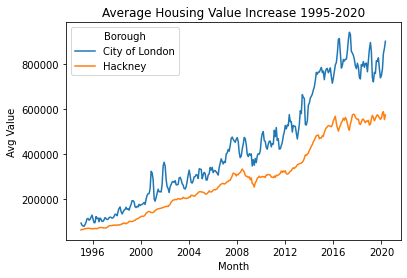

In [73]:
#plotting 
import seaborn as sns

sns.lineplot(data=citynhackney, x='Month', y='Avg Value', hue='Borough').set(title='Average Housing Value Increase 1995-2020')

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [24]:
def create_price_ratio(p):
  x = price_avg_pa[price_avg_pa['Borough']==p]
  p1998 = float(x['Avg Value'][x['Year'] == 1998])
  p2018 = float(x['Avg Value'][x['Year'] == 2018])
  ratio = (p1998/ p2018)
  return ratio

#test output
create_price_ratio('Hackney')

0.1613349445001764

In [25]:
boroughs = list(price_avg_pa['Borough'].unique())
b_price_change = {}

for borough in boroughs:
  increase_pct = "{:.2%}".format(create_price_ratio(borough))
  b_price_change.update({borough: increase_pct})

print(pd.DataFrame(b_price_change.items()))

                       0       1
0     Barking & Dagenham  20.42%
1                 Barnet  22.95%
2                 Bexley  23.54%
3                  Brent  20.43%
4                Bromley  24.42%
5                 Camden  20.26%
6                Croydon  23.80%
7                 Ealing  23.19%
8                Enfield  23.46%
9              Greenwich  21.00%
10               Hackney  16.13%
11  Hammersmith & Fulham  24.17%
12              Haringey  19.48%
13                Harrow  24.64%
14              Havering  23.12%
15            Hillingdon  23.81%
16              Hounslow  25.15%
17             Islington  20.64%
18  Kensington & Chelsea  19.68%
19  Kingston upon Thames  23.42%
20               Lambeth  20.17%
21              Lewisham  18.35%
22                Merton  21.09%
23                Newham  18.85%
24             Redbridge  22.37%
25  Richmond upon Thames  24.97%
26             Southwark  18.13%
27                Sutton  24.28%
28         Tower Hamlets  21.61%
29        

In [67]:
#Borough with the highest increase in Average value comparing year 2018 to year 1998
min(b_price_change, key=b_price_change.get)


'Hackney'

In [62]:
# Identifying the most expensive Borough in London
dflon_cleaned.loc[dflon_cleaned['Avg Value'] == dflon_cleaned['Avg Value'].max()]

,Borough,Postal Code,Month,Avg Value
13267,Kensington & Chelsea,E09000020,2018-01-01,1463377.875


[Text(0.5, 1.0, 'Average Housing Value Increase 1995-2020')]

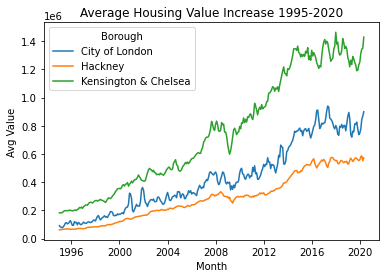

In [69]:
# putting Kensington & Chelsea, City of London and Hacney together for comparison
filter_list = ['Kensington & Chelsea', 'City of London', 'Hackney']

citynken = dflon_cleaned.loc[dflon_cleaned['Borough'].isin(filter_list)].reset_index(drop=True)
citynken['Year'] = citynken['Month'].map(lambda x: x.year)
citynken['Avg Value'] = citynken['Avg Value'].astype(float).round(2)
citynken.head()

import seaborn as sns

sns.lineplot(data=citynken, x='Month', y='Avg Value', hue='Borough').set(title='Average Housing Value Increase 1995-2020')

Comment - although Hackney has the biggest housing price increase in terms of %, on average the actual housing prices in Hackney is still lower at a lower level than general trend within City of London


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

***Q: which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

Several observations based on the dataset:

1.   Between the period of 1995 to 2020, Hackney is the London Borough with the greatest average increase in housing prices. Prices grew 763% over the period
2.   However, in terms of absolute value, Hackney is still below average of London housing prices
1.   In terms of absolute value, Kensington & Chelsea is the most expsnive Borough in London



